What does the code do till now:
- Defines the amount of positive and negative items. 
- Defines the probability that a rater gives correct answer to the true positive and the true negative
- Also defines the number of raters per item

The Data Generation process:
- We then define the dataframe with item, true_answer and rater_id
- We add a randon number between 0 and 1 as a column
- Based on the random number, if the rand < p_true_pos, we add 1 else 0. Same for true negative but 0 and 1
- At the end we generate a table which captures the fraction of correct answers given by raters
- We also create a frequency table of the answer column

In [20]:
install.packages("dplyr")
install.packages("magrittr")

Installing package into 'C:/Users/saxen/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\saxen\AppData\Local\R\win-library\4.3\00LOCK\dplyr\libs\x64\dplyr.dll to C:\Users\saxen\AppData\Local\R\win-library\4.3\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\saxen\AppData\Local\Temp\RtmpghYNSF\downloaded_packages


Installing package into 'C:/Users/saxen/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)



package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\saxen\AppData\Local\R\win-library\4.3\00LOCK\magrittr\libs\x64\magrittr.dll to C:\Users\saxen\AppData\Local\R\win-library\4.3\magrittr\libs\x64\magrittr.dll: Permission denied"
Warning message:
"restored 'magrittr'"



The downloaded binary packages are in
	C:\Users\saxen\AppData\Local\Temp\RtmpghYNSF\downloaded_packages


In [ ]:
install.packages("tidyr")

In [3]:
set.seed(42)
library(dplyr)
library(irr)
library(irrCAC)
library(tidyr)
library(magrittr)
library(ggplot)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: lpSolve


Attaching package: 'magrittr'


The following object is masked from 'package:tidyr':

    extract




ERROR: Error in library(ggplot): there is no package called 'ggplot'


In [32]:
n_pos <- 100  # number of true positive items
n_neg <- 100  # Number of true negative items

p_pos_correct <- 0.7  # Probability that a rater gives correct answer to a true positive
p_neg_correct <- 0.99 # probability that a rater gives correct answer to a true negative

n_raters_per_item <- 10

In [33]:
items <- rep(1:(n_neg + n_pos))

d <- data.frame(item = rep(items, n_raters_per_item),
     true_answer = rep(c(rep(1, n_pos),
                     rep(0, n_neg)), n_raters_per_item))

# Creates a data frame 'd' with columns 'item' and 'true_answer'.
# 'item' repeats the sequence of item identifiers for each rater.
# 'true_answer' contains the true classifications (1 for positive, 0 for negative), repeated for each rater.

d <- d %>% dplyr::arrange(item)
# Arranges the data frame by the 'item' column.

d$rater <- 1:n_raters_per_item
# Assigns each row a rater ID, from 1 to the number of raters per item.

d$rand <- runif(nrow(d))
# Adds a column 'rand' with random numbers between 0 and 1 for each row (rating).

d_pos <- d %>%
  dplyr::filter(true_answer == 1) %>%
  dplyr::mutate(answer = ifelse(rand < p_pos_correct, 1, 0))
# Filters rows where 'true_answer' is 1 (true positives).
# Adds a column 'answer', where raters correctly identify positive items based on the probability 'p_pos_correct'.

d_neg <- d %>%
  dplyr::filter(true_answer == 0) %>%
  dplyr::mutate(answer = ifelse(rand < p_neg_correct, 0, 1))
# Filters rows where 'true_answer' is 0 (true negatives).
# Adds a column 'answer', where raters correctly identify negative items based on the probability 'p_neg_correct'.

d <- dplyr::bind_rows(d_pos, d_neg)
# Combines the positive and negative data frames back into one.

d %>%
  dplyr::mutate(correct = (true_answer == answer)) %>%
  dplyr::group_by(true_answer) %>%
  dplyr::summarise(m = mean(correct))
# This code first creates a new column 'correct' that is TRUE when the rater's answer matches the true answer.
# Then it groups the data by 'true_answer' and calculates the mean of the 'correct' column for each group.
# 'm' will represent the fraction of correct answers for each type of true answer (true positive or true negative).

table(d$answer)

# Assuming 'd' is your existing data frame
# Transforming 'd' into a format suitable for kripp.alpha
ratings_matrix <- d %>%
  select(item, rater, answer) %>%
  pivot_wider(names_from = rater, values_from = answer)

# Removing the item column to get the matrix format
binary_ratings_matrix <- t(as.matrix(ratings_matrix[,-1]))

binary_ratings_matrix

true_answer,m
<dbl>,<dbl>
0,0.981
1,0.989



   0    1 
 992 1008 

1,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
5,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
6,0,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
7,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
8,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
10,1,1,1,1,1,1,1,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0


What should be the next step from here:
- Write code to calculate Krippendorf's alpha
- Generate the skew in data (number of TP and TN true items)

In [34]:
# Calculate Krippendorff's Alpha
alpha_result <- irr::kripp.alpha(binary_ratings_matrix, method = "nominal")
print(alpha_result)

 Krippendorff's alpha

 Subjects = 200 
   Raters = 10 
    alpha = 0.941 


In [35]:
calculate_krippendorff_alpha <- function(n_pos, n_neg, p_pos_correct, p_neg_correct, n_raters_per_item) {
  # Create the data frame with true answers
  d <- data.frame(item = rep(1:(n_neg + n_pos), each = n_raters_per_item),
                  true_answer = rep(c(rep(1, n_pos), rep(0, n_neg)), each = n_raters_per_item))

  # Assign rater IDs and generate random numbers
  d$rater <- rep(1:n_raters_per_item, times = n_neg + n_pos)
  d$rand <- runif(nrow(d))

  # Assign answers based on true_answer and probabilities
  d$answer <- with(d, ifelse(true_answer == 1, ifelse(rand < p_pos_correct, 1, 0), 
                            ifelse(rand < p_neg_correct, 0, 1)))

  # Transform data into matrix format for Krippendorff's alpha calculation
  ratings_matrix <- d %>%
    select(item, rater, answer) %>%
    pivot_wider(names_from = rater, values_from = answer)

  binary_ratings_matrix <- t(as.matrix(ratings_matrix[,-1]))

  # Calculate Krippendorff's alpha
  alpha <- kripp.alpha(binary_ratings_matrix, method = "nominal")

  return(alpha$value)
}

# Example usage of the function
krippendorff_alpha <- calculate_krippendorff_alpha(100, 100, 0.99, 0.99, 10)
krippendorff_alpha



[1] 0.9500027

In [8]:
# remove.packages("ggplot2") # Unisntall ggplot
# install.packages("ggplot2") # Install it again
library(ggplot2) # Load the librarie (you have to do this one on each new session)

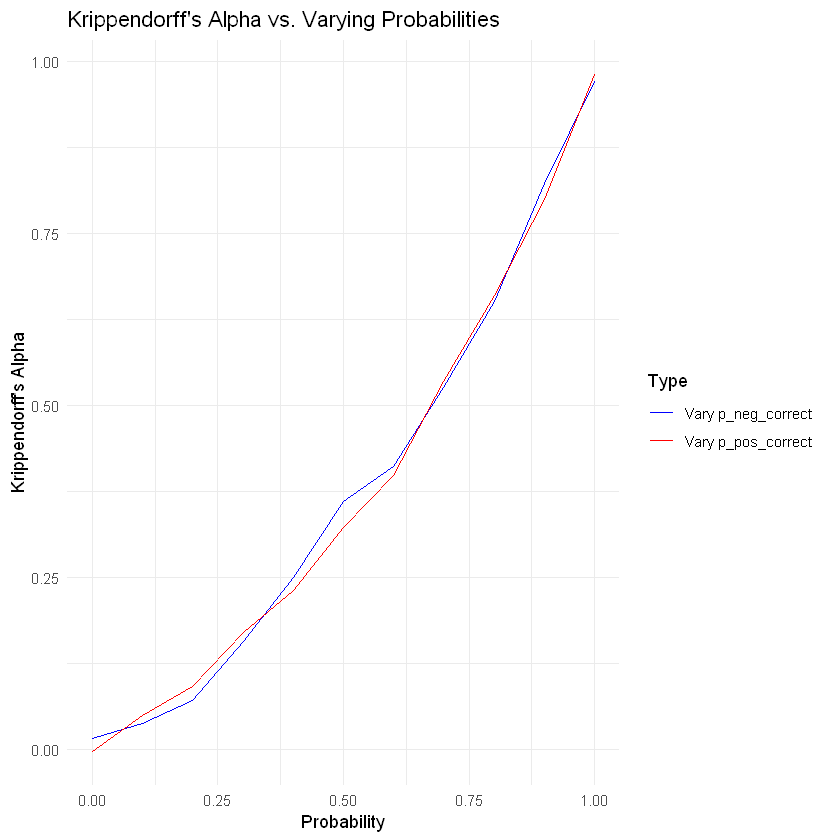

In [9]:
# Initialize vectors to store the values
probabilities <- seq(0, 1, by = 0.1)
alpha_values_pos_constant <- numeric(length(probabilities))
alpha_values_neg_constant <- numeric(length(probabilities))

# Constant values for p_pos_correct and p_neg_correct
constant_pos_correct <- 0.99  # Keeping p_pos_correct constant
constant_neg_correct <- 0.99  # Keeping p_neg_correct constant

# Calculate Krippendorff's alpha for varying p_neg_correct, keeping p_pos_correct constant
for (i in seq_along(probabilities)) {
  alpha_values_neg_constant[i] <- calculate_krippendorff_alpha(100, 100, constant_pos_correct, probabilities[i], 10)
}

# Calculate Krippendorff's alpha for varying p_pos_correct, keeping p_neg_correct constant
for (i in seq_along(probabilities)) {
  alpha_values_pos_constant[i] <- calculate_krippendorff_alpha(100, 100, probabilities[i], constant_neg_correct, 10)
}

data_to_plot <- data.frame(
    Probability = rep(probabilities, times = 2),
    KrippendorffAlpha = c(alpha_values_neg_constant, alpha_values_pos_constant),
    Type = rep(c("Vary p_neg_correct", "Vary p_pos_correct"), each = length(probabilities))
)

# Create the plot
ggplot(data_to_plot, aes(x = Probability, y = KrippendorffAlpha, color = Type, group = Type)) +
  geom_line() +
  ggtitle("Krippendorff's Alpha vs. Varying Probabilities") +
  xlab("Probability") +
  ylab("Krippendorff's Alpha") +
  scale_color_manual(values = c("blue", "red")) +
  theme_minimal()

In [10]:
calculate_krippendorff_alpha_with_accuracy <- function(n_pos, n_neg, accuracy, n_raters_per_item) {
  # Create the data frame with true answers
  d <- data.frame(item = rep(1:(n_neg + n_pos), each = n_raters_per_item),
                  true_answer = rep(c(rep(1, n_pos), rep(0, n_neg)), each = n_raters_per_item))

  # Assign rater IDs and generate random numbers
  d$rater <- rep(1:n_raters_per_item, times = n_neg + n_pos)
  d$rand <- runif(nrow(d))

  # Assign answers based on true_answer and accuracy
  d$answer <- with(d, ifelse(true_answer == 1, ifelse(rand < accuracy, 1, 0), 
                            ifelse(rand < accuracy, 0, 1)))

  # Transform data into matrix format for Krippendorff's alpha calculation
  ratings_matrix <- d %>%
    select(item, rater, answer) %>%
    pivot_wider(names_from = rater, values_from = answer)

  binary_ratings_matrix <- t(as.matrix(ratings_matrix[,-1]))

  # Calculate Krippendorff's alpha
  alpha <- kripp.alpha(binary_ratings_matrix, method = "nominal")

  return(alpha$value)
}



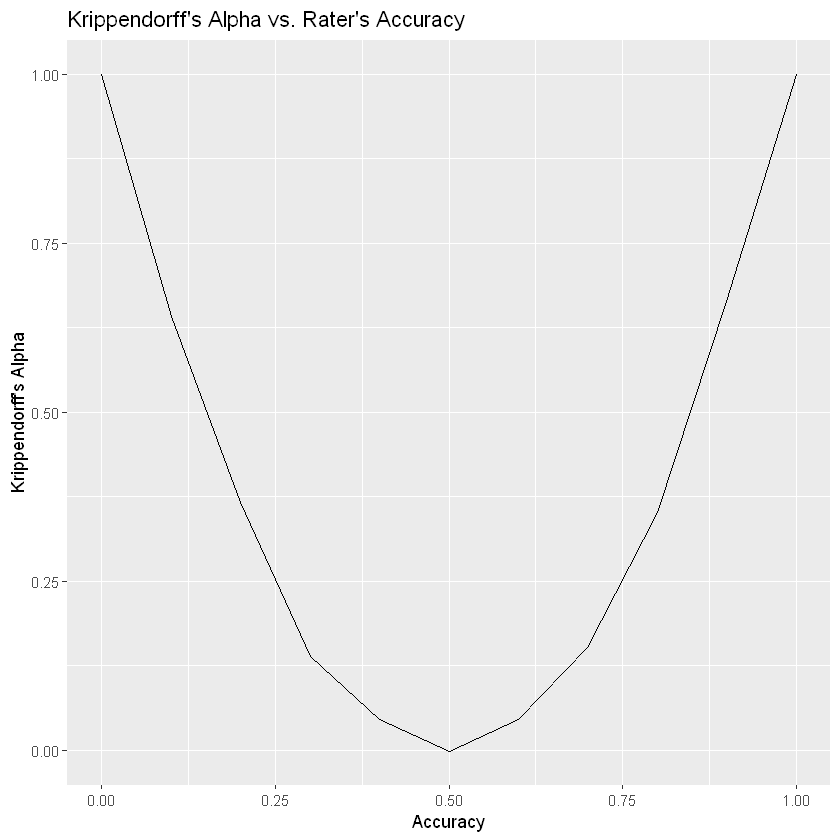

In [11]:
# Sequence of accuracy values
accuracies <- seq(0, 1, by = 0.1)

# Initialize a vector to store Krippendorff's alpha values
alpha_values <- numeric(length(accuracies))

# Calculate Krippendorff's alpha for each accuracy
for (i in seq_along(accuracies)) {
  alpha_values[i] <- calculate_krippendorff_alpha_with_accuracy(100, 100, accuracies[i], 10)
}

# Create the plot
data_to_plot <- data.frame(Accuracy = accuracies, KrippendorffAlpha = alpha_values)
ggplot(data_to_plot, aes(x = Accuracy, y = KrippendorffAlpha)) +
  geom_line() +
  ggtitle("Krippendorff's Alpha vs. Rater's Accuracy") +
  xlab("Accuracy") +
  ylab("Krippendorff's Alpha")

In [31]:
# total_items is the total number of items (both positive and negative).
# split_ratio is the proportion of positive items (a value between 0 and 1).

calculate_krippendorff_alpha_with_split_ratio <- function(total_items, split_ratio, accuracy, n_raters_per_item) {
  # Calculate n_pos and n_neg from total_items and split_ratio
  n_pos <- round(total_items * split_ratio)
  n_neg <- total_items - n_pos

  # Create the data frame with true answers
  d <- data.frame(item = rep(1:total_items, each = n_raters_per_item),
                  true_answer = rep(c(rep(1, n_pos), rep(0, n_neg)), each = n_raters_per_item))

  # Assign rater IDs and generate random numbers
  d$rater <- rep(1:n_raters_per_item, times = total_items)
  d$rand <- runif(nrow(d))

  # Assign answers based on true_answer and accuracy
  d$answer <- with(d, ifelse(true_answer == 1, ifelse(rand < accuracy, 1, 0), 
                            ifelse(rand < accuracy, 0, 1)))

  # Transform data into matrix format for Krippendorff's alpha calculation
  ratings_matrix <- d %>%
    select(item, rater, answer) %>%
    pivot_wider(names_from = rater, values_from = answer)

  binary_ratings_matrix <- t(as.matrix(ratings_matrix[,-1]))

  # Calculate Krippendorff's alpha
  alpha <- kripp.alpha(binary_ratings_matrix, method = "nominal")

  return(alpha$value)
}


In [28]:
# Total number of items
total_items <- 200

# Split ratio (proportion of positive items)
split_ratio <- 0.4

# Accuracy (probability of a rater giving a correct answer)
accuracy <- 0.9

# Number of raters per item
n_raters_per_item <- 10

# Calculate Krippendorff's alpha
krippendorff_alpha <- calculate_krippendorff_alpha_with_split_ratio(total_items, split_ratio, accuracy, n_raters_per_item)

# Print the result
print(krippendorff_alpha)


[1] 0.6350004


In [29]:
library(ggplot2)

# Assume your function calculate_krippendorff_alpha_with_split_ratio is defined

# Parameters
total_items <- 200  # Total number of items
accuracy <- 0.9  # Accuracy
n_raters_per_item <- 100  # Number of raters per item

# Create a sequence for split ratio from 0.1 to 0.9
split_ratios <- seq(0.1, 0.9, by = 0.1)

# Initialize a vector to store Krippendorff's alpha values
alpha_values <- numeric(length(split_ratios))

# Calculate Krippendorff's alpha for each split ratio
for (i in seq_along(split_ratios)) {
  alpha_values[i] <- calculate_krippendorff_alpha_with_split_ratio(
                        total_items, split_ratios[i], accuracy, n_raters_per_item)
}

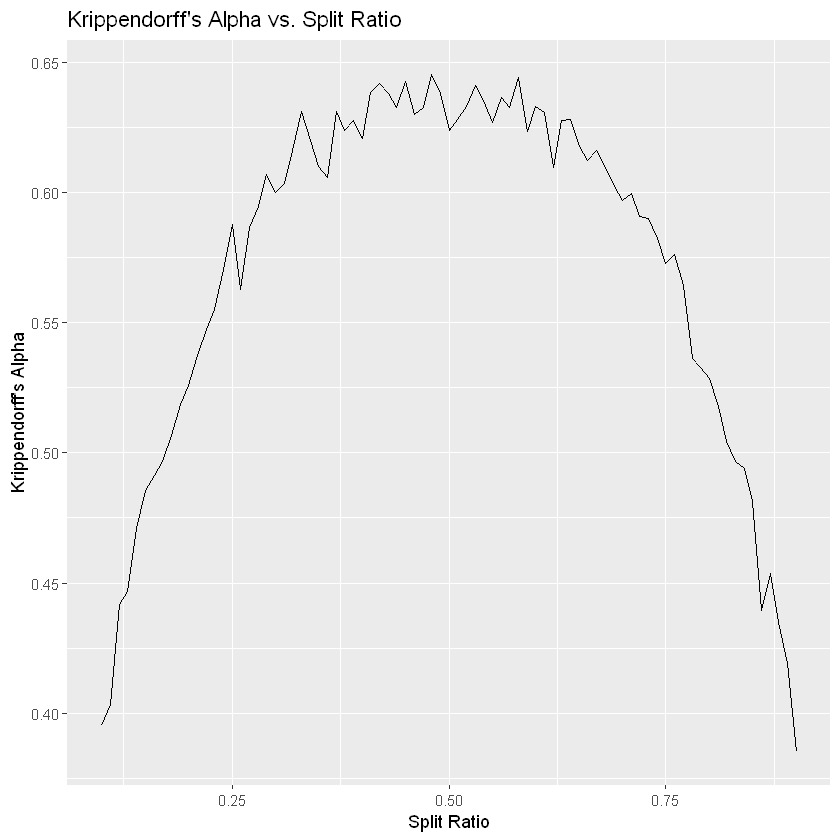

In [30]:

# Create the plot
data_to_plot <- data.frame(SplitRatio = split_ratios, KrippendorffAlpha = alpha_values)
ggplot(data_to_plot, aes(x = SplitRatio, y = KrippendorffAlpha)) +
  geom_line() +
  ggtitle("Krippendorff's Alpha vs. Split Ratio") +
  xlab("Split Ratio") +
  ylab("Krippendorff's Alpha")


In [22]:
# Example usage of the function
total_items <- 100  # You can adjust this value as needed
n_raters_per_item <- 5  # Adjust this based on your requirements

# Define accuracies and split ratios
accuracies <- seq(0.1, 0.9, by = 0.1)
split_ratios <- c(0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1)

# Create an empty data frame to store results
results <- expand.grid(accuracy = accuracies, split_ratio = split_ratios)
results$KA <- NA  # Add a column to store Krippendorff's alpha

# Calculate Krippendorff's alpha for each combination of accuracy and split ratio
for (i in 1:nrow(results)) {
  results$KA[i] <- calculate_krippendorff_alpha_with_split_ratio(
    total_items, results$split_ratio[i], results$accuracy[i], n_raters_per_item)
}

# Reshape the data for presentation similar to the image
results_table <- reshape2::dcast(results, accuracy ~ split_ratio, value.var = "KA")

# Print the results table
results_table

accuracy,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.1,0.49233601,0.492522270,0.54660130,0.62525267,0.568216000,0.69076387,0.58336247,0.477594667,0.46945269
0.2,0.05386217,0.336377635,0.34038882,0.36156152,0.320296499,0.38513218,0.29950425,0.327124825,0.19620474
0.3,0.04127821,0.087892615,0.25907180,0.10602870,0.171087740,0.21607843,0.14626042,0.093341800,0.05350379
0.4,0.02425722,0.008930161,0.04456253,0.06920790,0.004243086,0.00809924,0.07355667,0.025110893,0.08258454
0.5,-0.02718587,0.060470000,-0.02626302,-0.01975106,0.004482072,0.06787150,-0.02184433,-0.020812974,0.01593971
0.6,0.01672608,0.051692267,0.01614452,0.07192943,0.012494000,0.04769556,0.03787842,0.003998153,0.02628496
0.7,0.04063350,0.090266081,0.26408301,0.13681093,0.151324116,0.11129223,0.13237847,0.114373587,0.04740821
0.8,0.21092105,0.231237826,0.28156527,0.33966870,0.423956199,0.35736728,0.30590278,0.261072969,0.11686590
0.9,0.38905868,0.605460526,0.56049030,0.66581013,0.660082981,0.64879082,0.62415043,0.469981204,0.44224330
